# Dictionary Graph Export

In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
# create GraphiPy object
graphipy = GraphiPy("dictionary")

In [3]:
# The reddit API needs these credentials
reddit_api_credentials = {
    "client_id": ' ',
    "client_secret": ' ',
    "user_agent": ' ',
    "username": " ",
    "password": " "
}

# create the reddit object
reddit = graphipy.get_reddit(reddit_api_credentials)

# Find Comments in a Submission

In [4]:
submission_id = "9uolpb"

submission_comments = reddit.fetch_submission_comments(graphipy.create_graph(), submission_id, limit=5)
sc_nodes = submission_comments.get_nodes()
sc_edges = submission_comments.get_edges()

# Visualization with NetworkX

In [5]:
import networkx as nx

In [6]:
nx_graph = nx.Graph()

In [7]:
edge_dict = sc_edges
node_dict = sc_nodes

for key in edge_dict:
    edges = edge_dict[key]
    
    for edge in edges.values():
        source = edge.Source
        target = edge.Target
        attr = {
            "Label": edge.Label, 
            "label_attribute": edge.label_attribute,
            "_id": edge._id
        }
        nx_graph.add_edge(source, target, attr_dict=attr)

In [8]:
for key in node_dict:
    nodes = node_dict[key]
    
    for key in nodes.keys():
        node = vars(nodes[key])
        nx_node = nx_graph.node[key]
        
        for attr in node.keys():
            nx_node[attr] = node[attr]

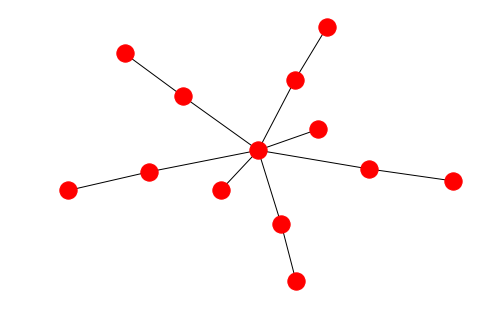

In [16]:
nx.draw(nx_graph)

# Visualization with NetworkX from CSV Files

In [10]:
# Export graph as CSV files
prefix = "dictionary"
submission_comments.export_all_CSV(prefix) # will create csv files in csv/<prefix>/ directory

In [11]:
g = nx.Graph()

In [12]:
# Import CSV files
import os
import csv
path = os.getcwd() + "\\csv\\" + prefix + "\\"
edges_path = path + "edges\\"

for filename in os.listdir(edges_path):
    reader = csv.DictReader(open(edges_path + filename))
    for edge in reader:
        source = edge["Source"]
        target = edge["Target"]
        attr = {
            "Label": edge["Label"],
            "label_attribute": edge["label_attribute"],
            "_id": edge["_id"]
        }
        g.add_edge(source, target, attr_dict=attr)

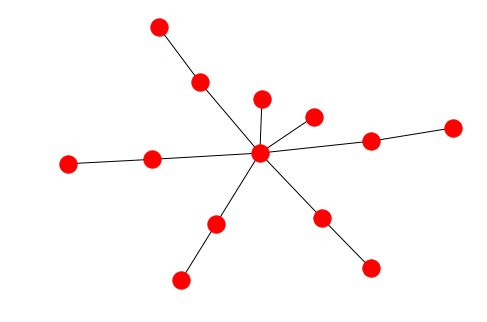

In [13]:
# Draw the graph without node labels
nx.draw(g)

In [14]:
# Add node attributes
nodes_path = path + "nodes\\"

for filename in os.listdir(nodes_path):
    reader = csv.DictReader(open(nodes_path + filename))
    for node in reader:
        node_id = node["_id"]
        nx_node = g.node[node_id]
        for attr in node.keys():
            nx_node[attr] = node[attr]

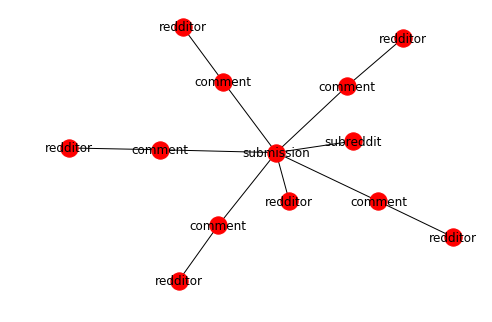

In [15]:
# Draw the graph with node labels
labels = dict((node, data["Label"]) for node, data in g.nodes(data=True))
nx.draw(g, labels=labels)